> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [6]:
#### Criação de DataFrame
import pandas as pd

df_hist = pd.read_csv('wc_formatado.csv') #ler arquivo
df_hist['confronto'] = df_hist['time_1'].astype(str) + ' x ' + df_hist['time_2'].astype(str) #concatenar times
df_hist = df_hist[['confronto', 'comparecimento','ano']] #pegar apenas dados necessários
df_hist = df_hist[df_hist['comparecimento'] > 0] #remover valores incorretos
df_hist_grouped = df_hist.groupby('ano')['comparecimento'].sum().reset_index()#agrupar dados

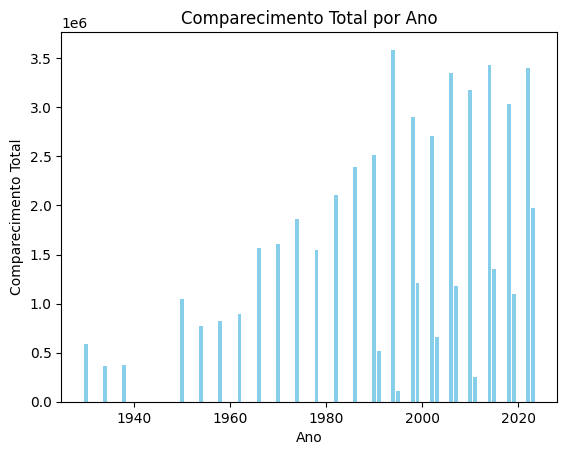

In [6]:
#### Solução com matplotlib

#criar gráfico
plt.bar(df_hist_grouped['ano'], df_hist_grouped['comparecimento'], color='skyblue')

#Nomes
plt.title('Comparecimento Total por Ano')
plt.xlabel('Ano')
plt.ylabel('Comparecimento Total')

plt.show() #mostrar gráfico

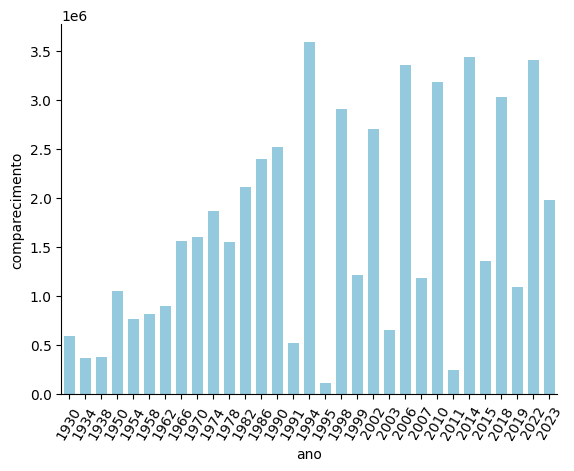

In [7]:
#### solução com seaborn
ax = sns.barplot(x='ano', y='comparecimento', data=df_hist_grouped, color='skyblue', width=0.7)

ax.tick_params(axis='x', rotation=60, labelright=False)
sns.despine()

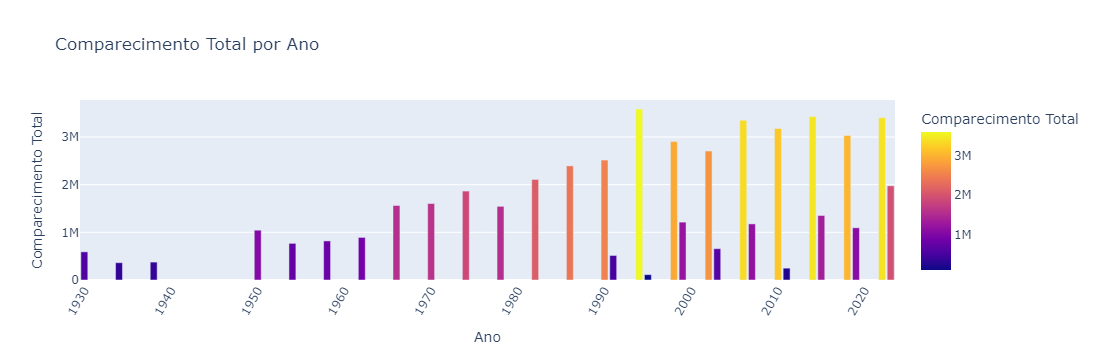

In [9]:
#### solução com plotly
fig = px.bar(df_hist_grouped, x='ano', y='comparecimento',
            title='Comparecimento Total por Ano', 
            labels={'comparecimento': 'Comparecimento Total', 'ano': 'Ano'},
            color='comparecimento',
)

fig.update_layout(xaxis_tickangle=-60)
fig.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [7]:
#### Criação de dataframe
import pandas as pd
import numpy as np

df_sca = pd.read_csv('wc_formatado.csv')
gols = df_sca[['gols_1', 'gols_2']] * np.random.random((len(df_sca),2))

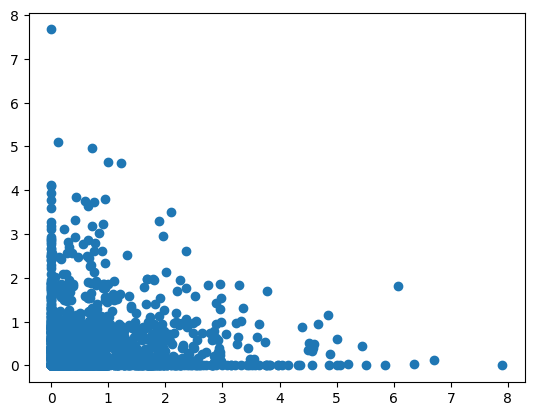

In [4]:
#### solução com matplotlib

plt.scatter(x=gols['gols_1'], y=gols['gols_2'])
plt.show()

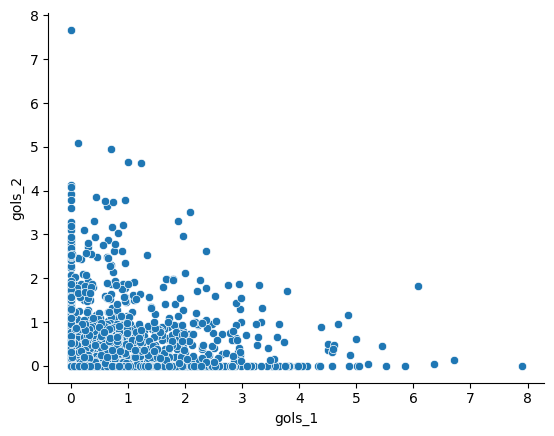

In [9]:
#### solução com seaborn

sns.scatterplot(gols, x='gols_1', y='gols_2')
sns.despine()

In [11]:
#### solução com plotly

fig = px.scatter(gols, x=gols['gols_1'], y=gols['gols_2'])
fig.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

In [2]:
#### Criando Dataframe

import pandas as pd
import numpy as np

df_bar = pd.read_csv('wc_formatado.csv') 

#código do exercício anterior
time_1_df = df_bar[['time_1', 'ano', 'copa']].rename(columns={'time_1': 'país'})
time_2_df = df_bar[['time_2', 'ano', 'copa']].rename(columns={'time_2': 'país'})
participacao_df = pd.concat([time_1_df, time_2_df])
participacao_df = participacao_df.drop_duplicates(subset=['país', 'ano','copa'])
participacao = participacao_df.groupby(['país', 'copa']).size().reset_index(name='num_copas')

participacao_pivot = participacao.pivot_table(
    index='país', columns='copa', values='num_copas', aggfunc='sum', fill_value=0
)

# Somar participações masculinas e femininas para selecionar os top 10 países
participacao_pivot['total_participacoes'] = participacao_pivot.sum(axis=1)
top_10_paises = participacao_pivot.nlargest(10, 'total_participacoes')


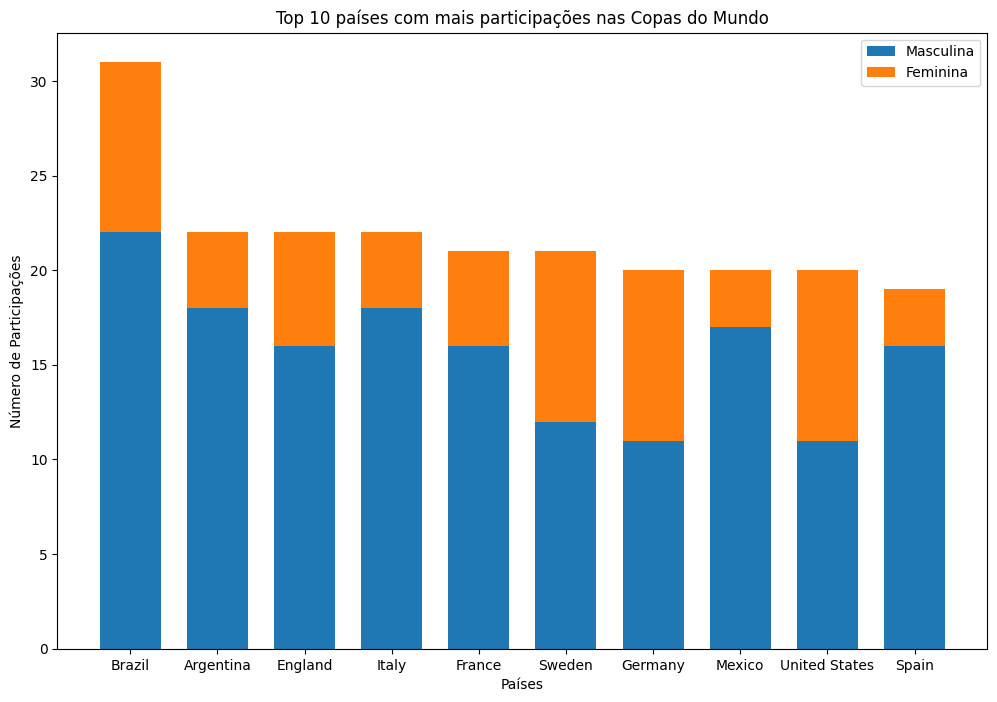

In [5]:
#### solução com matplotlib

# Separando os dados masculinos e femininos
masculina = top_10_paises['Masculina']
feminina = top_10_paises['Feminina']

# Criar gráfico
fig, ax = plt.subplots(figsize=(12,8))
paises = top_10_paises.index
width = 0.7

# Bares empilhados: Masculina embaixo, Feminina em cima
ax.bar(paises, masculina, width, label='Masculina')
ax.bar(paises, feminina, width, label='Feminina', bottom=masculina)

# Título e rótulos
ax.set_title('Top 10 países com mais participações nas Copas do Mundo')
ax.set_xlabel('Países')
ax.set_ylabel('Número de Participações')
ax.legend()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9056\2636493571.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(participacao_long['país'], rotation=45)


<Axes: title={'center': 'Top 10 países com mais participações nas Copas do Mundo'}, xlabel='Países', ylabel='Número de Participações'>

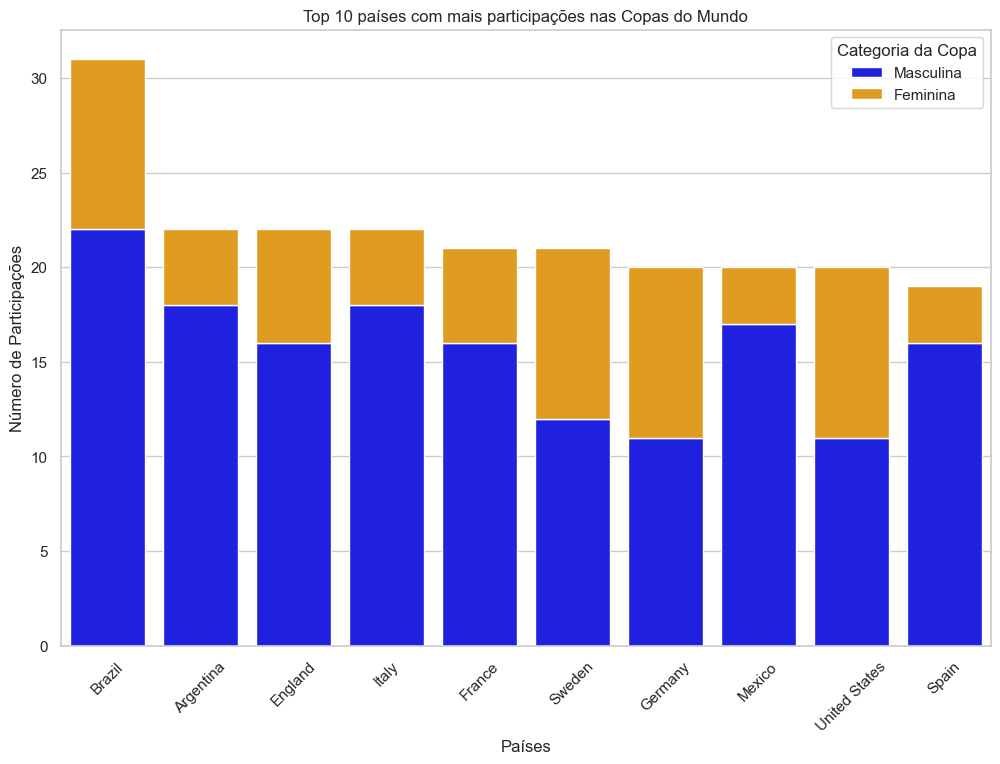

In [20]:
#### solução com seaborn

participacao_long = top_10_paises[['Masculina', 'Feminina']].reset_index()

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

#uso do seaborn
sns.barplot(
    data=participacao_long, 
    x='país', y='Masculina', color='blue', label='Masculina', ax=ax
)
sns.barplot(
    data=participacao_long, 
    x='país', y='Feminina', color='orange', label='Feminina', ax=ax,
    bottom=participacao_long['Masculina']
)

ax.set_title('Top 10 países com mais participações nas Copas do Mundo')
ax.set_xlabel('Países')
ax.set_ylabel('Número de Participações')
ax.legend(title='Categoria da Copa')
ax.set_xticklabels(participacao_long['país'], rotation=45)

ax

In [15]:
#### solução com plotly

masculina = top_10_paises['Masculina']
feminina = top_10_paises['Feminina']

paises = top_10_paises.index

df = pd.DataFrame({
    'Países': paises,
    'Masculina': masculina,
    'Feminina': feminina
})

df_long = df.melt(id_vars='Países', value_vars=['Masculina', 'Feminina'], var_name='Categoria', value_name='Número de participações')

# Gerando o gráfico empilhado
fig = px.bar(df_long, x='Países', y='Número de participações', color='Categoria', barmode='stack')

fig.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/